# "타이타닉 생존자 예측"을 통해 알아보는 머신러닝(ML) 기초 with Python

## 데이터 분석을 위한 환경 설정

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from sklearn import preprocessing

## 데이터 불러오기

In [2]:
# 학습 데이터
titanic_df = pd.read_csv("./input/train.csv")

# 검증 데이터
test_df    = pd.read_csv("./input/test.csv")

## 1. 데이터 탐색

### a. 데이터 확인

In [3]:
# 학습용 데이터
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 검증 데이터
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### b. 데이터 검증

In [5]:
# 누락 데이터 검증
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age 처리

In [6]:
# Age의 누락된 데이터
sum(pd.isnull(titanic_df['Age']))

177

In [7]:
# Age의 전체 데이터 중에서 누락된 데이터가 차지하는 비율
round(177/(len(titanic_df["PassengerId"])),4)

0.1987

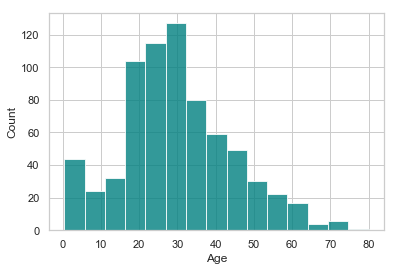

In [8]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

'Age'가 오른쪽으로 치우쳐져 있기 때문에 평균을 사용하기 보다는 '중앙'값을 사용

In [9]:
titanic_df["Age"].median(skipna=True)

28.0

#### Cabin 처리

In [10]:
round(687/len(titanic_df["PassengerId"]),4)

0.771

77%의 데이터가 누락, 해당 데이터는 모두 무시

#### Embarked 처리

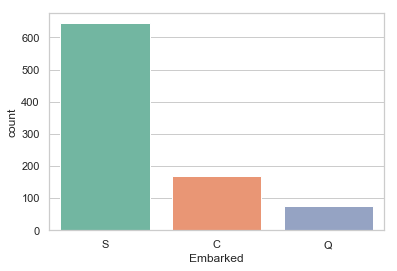

In [11]:
sns.countplot(x='Embarked',data=titanic_df,palette='Set2')
plt.show()

비어있는 2개는 'S'로 처리

### 데이터 정리

In [12]:
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1)

In [13]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

In [14]:
train2 = pd.get_dummies(train_data, columns=["Pclass"])
train3 = pd.get_dummies(train2, columns=["Embarked"])
train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [15]:
df_final = train4

In [16]:
test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

In [17]:
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)
test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])
test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)
test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [18]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


### 데이터 분석

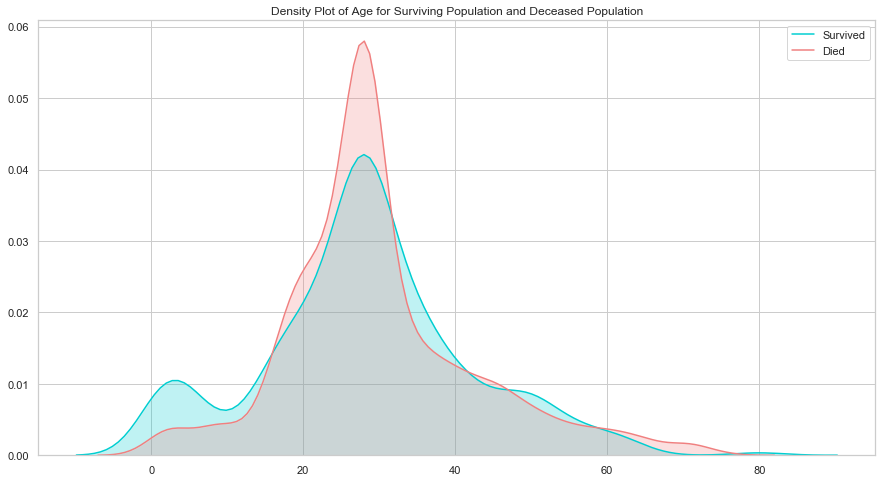

In [19]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

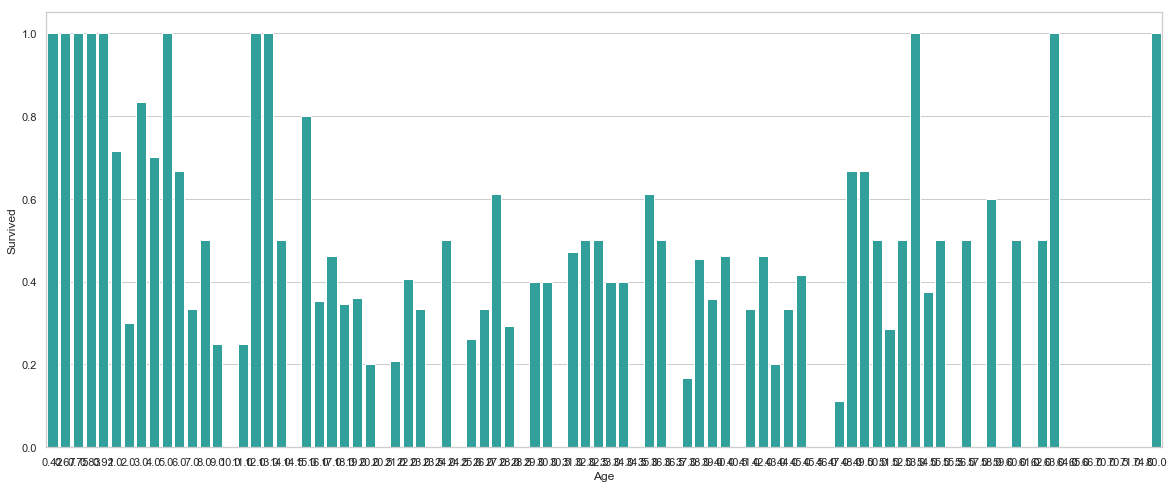

In [20]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [21]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [22]:
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

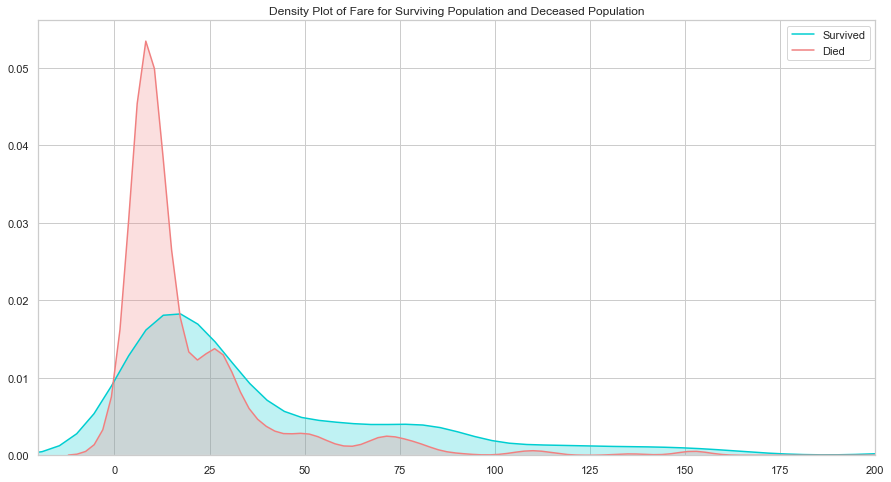

In [23]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.xlim(-20,200)
plt.show()

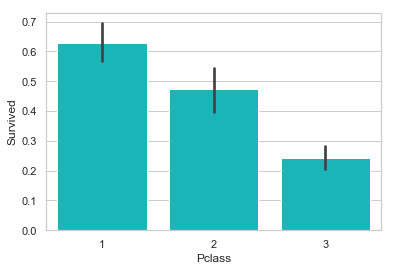

In [24]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="darkturquoise")
plt.show()

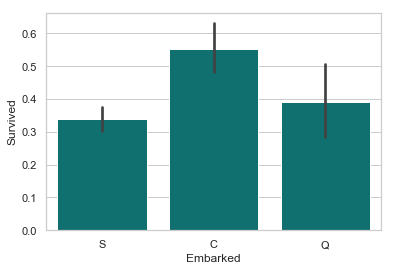

In [25]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="teal")
plt.show()

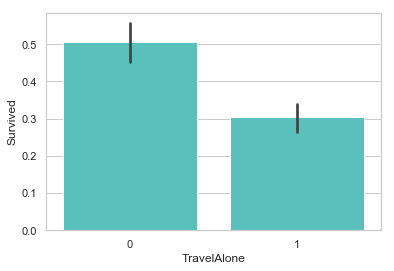

In [26]:
sns.barplot('TravelAlone', 'Survived', data=df_final, color="mediumturquoise")
plt.show()

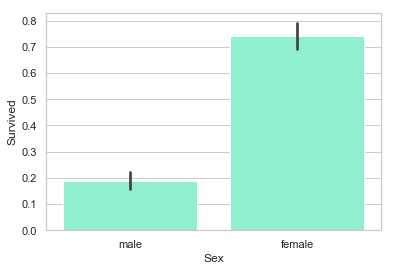

In [27]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()

In [28]:
df_final.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
6,0,54.0,51.8625,1,1,0,0,0,0,1,1,0
7,0,2.0,21.0750,0,0,0,1,0,0,1,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0,1


In [29]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

## 특징 추출

In [30]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 May 2019   Pseudo R-squ.:                  0.3237
Time:                        01:16:39   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

In [31]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 May 2019   Pseudo R-squ.:                  0.3113
Time:                        01:16:39   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

## 모델 수립

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

logreg.score(X2, Y)

/Users/sd/Works/Study-ML/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

## 모델 검증

### 교차검증

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)

cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

/Users/sd/Works/Study-ML/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7949438202247191

In [35]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.80


/Users/sd/Works/Study-ML/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

/Users/sd/Works/Study-ML/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7790779700402505

ROC AUC: 0.845


/Users/sd/Works/Study-ML/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


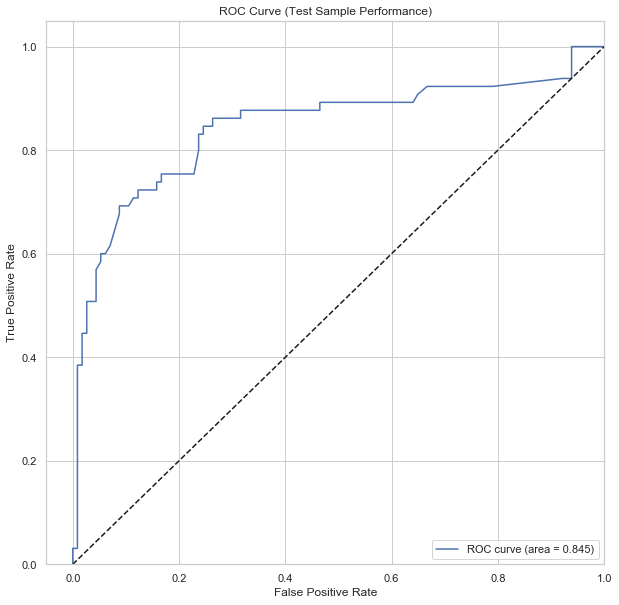

In [37]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

## 모델 적용

In [38]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
random_forest.score(X, Y)

0.978675645342312

In [39]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

In [40]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [41]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X_DT=df_final[cols]
Y_DT=df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

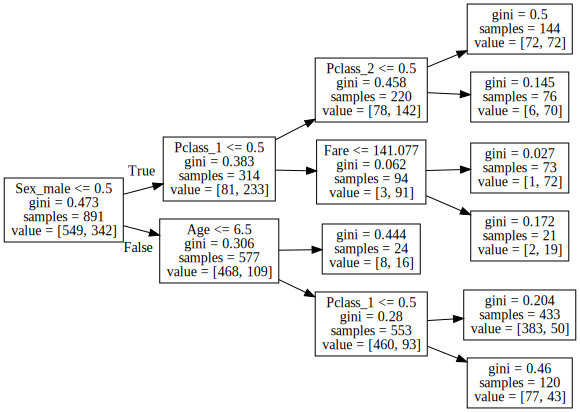

In [42]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz